In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.datasets import make_moons

In [2]:
# You can simply change this k value and run the program again
# k means the number of clusters
k = 4

In [3]:
def generateData(k):
    data, clus = make_blobs(n_samples=200, centers=k, n_features=2, cluster_std = 0.7,random_state=0)
    return data

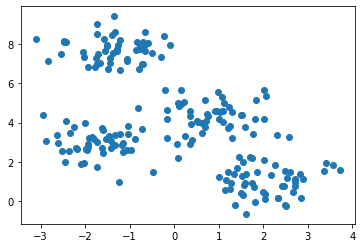

In [4]:
data = generateData(k)
x, y = data[:,0],data[:,1]
plt.scatter(x,y)

In [5]:
def generateCentroids(clusters, size, k):
    # choose centroids inside the data
    centroids = list()
    for i in range(k):
        index = np.random.randint(0, len(clusters[i][0]))
        centroids.append((clusters[i][0][index],clusters[i][1][index]))
    return centroids

In [6]:
def generateColors(k):
    # generate different colors for each cluster
    colstr = '0','1','2','3','4','5','6','7','8','9','A','B','C','D','E','F'
    colset = set()

    for i in range(k):
        color = "#"
        for j in range(6):
            color += np.random.choice(colstr)
        if color not in colset:
            colset.add(color)
    return list(colset)

In [7]:
def randomlyAssign(x,y,k):
    # Randomly assign each data point to a cluster
    clusters = {i:[[],[]] for i in range(0,k)}
    for i in range(len(x)):
        cluster = np.random.randint(0, k)
        clusters[cluster][0].append(x[i])
        clusters[cluster][1].append(y[i])
    return clusters

In [8]:
def plotData(k,ax,clusters, centroids, colmap):
    # Plot data points by showing their assigned cluster
    for cluster, points in clusters.items():
        ax.scatter(points[0], points[1], color=colmap[cluster])
    
    # Plot the centroids
    for i in range(k):
        cenx, ceny = centroids[i]
        ax.scatter(cenx, ceny, color='k', s=100)


In [9]:
def findClusterCentroids(clusters, centroids):
    # Find cluster centroids by taking the average of the points in that cluster
    for cluster, points in clusters.items():
        curX, curY = centroids[cluster]
        if len(points[0])==0:
            return (centroids, -1)
        cenX = np.average(np.array(points[0]))
        cenY = np.average(np.array(points[1]))    
        centroids[cluster] = [cenX, cenY]
        
        dist = math.sqrt((curX-cenX)**2 + (curY-cenY)**2)
        if dist < 0.000000000001:
            return (centroids,1)

    return (centroids,0)

In [10]:
def calDistance(point1, point2):
    # Eucledean distance
    return math.sqrt((point1[0]-point2[0])**2 + (point1[1]-point2[1])**2)

In [11]:
def assignToCentroid(x,y,k,centroids,clusters):
    # Assign each data point to its closest cluster centroid.
    clusters = {i:[[],[]] for i in range(0,k)}
    for i in range(len(x)):
        dist = float('inf')
        cluster = 0
        for j in range(k):
            centroid = centroids[j]
            newDist = calDistance([x[i],y[i]], centroid)
            if newDist < dist:
                dist = newDist
                cluster = j
        clusters[cluster][0].append(x[i])
        clusters[cluster][1].append(y[i])
    return clusters

In [12]:
def calculateObjective(clusters, centroids):
    total = 0
    seen = set()
    for cluster, points in clusters.items():
        x, y = points[0], points[1]
        for i in range(len(x)):
            px, py = x[i], y[i]
            for j in range(len(x)):
                px2, py2 = x[j], y[j]
                if (px2, py2) in seen:
                    continue
                total += (px-px2)**2 + (py-py2)**2
            seen.add((px,py))
    return total

In [13]:
def runKMeans(k, plot=True, fig=None, axs=None):
    #First step (assign points to clusters)
    clusters = randomlyAssign(x,y,k)
    # Assign a color to each cluster
    centroids = generateCentroids(clusters, len(x), k)
    colmap = generateColors(k)
    for i in range(k):
        cenx, ceny = centroids[i]
        #plt.scatter(cenx, ceny, color=colmap[i])

    objs = list()
    tur = 0
    while True:
        
        obj = calculateObjective(clusters,centroids)
        centroids, stop = findClusterCentroids(clusters, centroids)
        
        # Plot iterations
        if tur < 4 and plot:
            plotData(k,axs[tur],clusters, centroids, colmap)
            axs[tur].set_ylabel("x2")
            axs[tur].set_xlabel("x1")
            axs[tur].set_title(str(tur)+" iteration")

        objs.append(obj)
        tur+=1
        clusters = assignToCentroid(x,y,k,centroids,clusters)

        if stop == 1:
            break
            
        # checks if there is a cluster with no points. If there is, it runs the program from beginning.
        if stop == -1:
            if fig:
                fig.clf()
                axs = [fig.add_subplot(2,2,i) for i in range(1,5)]
            clusters = randomlyAssign(x,y,k)
            centroids = generateCentroids(clusters, len(x), k)
            objs = list()
            tur = 0
            
    return (clusters, centroids,colmap, tur, objs,x, y)


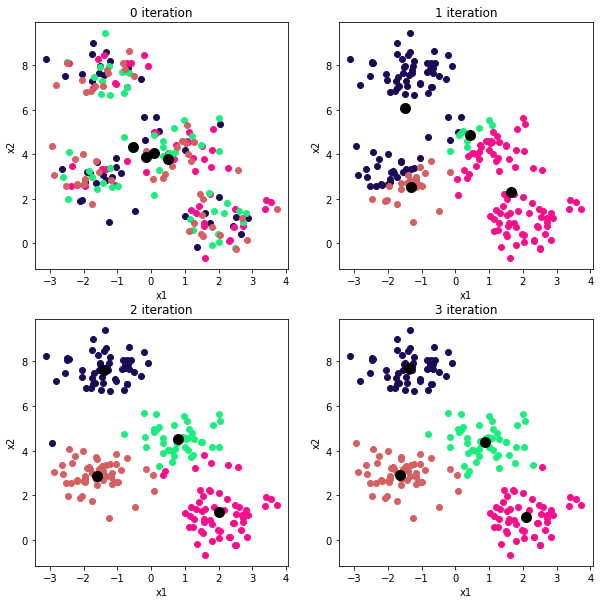

In [14]:
fig = plt.figure(figsize=(10,10))
axs = [fig.add_subplot(2,2,i) for i in range(1,5)]
clusters, centroids, colmap, tur, objs, x, y = runKMeans(k, True, fig,axs)


Text(0.5, 1.0, 'last iteration')

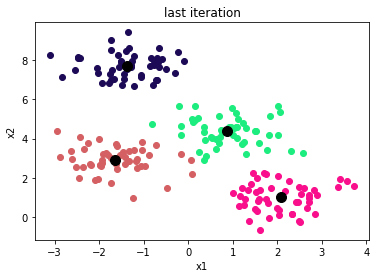

In [15]:
plotData(k,plt,clusters, centroids, colmap)
plt.xlabel("x1")
plt.ylabel("x2")
plt.title("last iteration")

Text(0.5, 1.0, 'Objective Function')

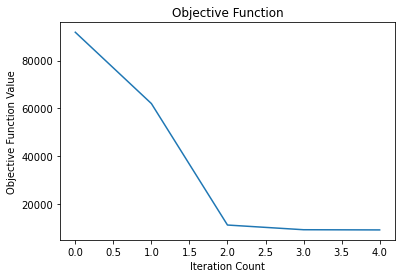

In [16]:
plt.plot(np.arange(0,tur), objs)
plt.ylabel("Objective Function Value")
plt.xlabel("Iteration Count")
plt.title("Objective Function")

In [17]:
# Run scikit-learn KMeans
kmeans = KMeans(n_clusters=k)
X = [[x[i],y[i]] for i in range(len(x))]
kmeans.fit(X)

KMeans(n_clusters=4)

Text(0.5, 1.0, 'Scikit K-Means')

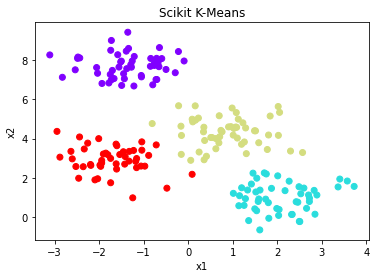

In [18]:
plt.scatter(x,y, c=kmeans.labels_, cmap='rainbow')
plt.xlabel("x1")
plt.ylabel("x2")
plt.title("Scikit K-Means")

In [19]:
kmeans.cluster_centers_

array([[-1.36512238,  7.70188306],
       [ 2.07464749,  0.9869902 ],
       [ 0.86008475,  4.31501411],
       [-1.70639178,  2.9104771 ]])

In [20]:
centroids

[[-1.365122378545809, 7.701883059349756],
 [2.084264173241517, 1.032063553997765],
 [0.8624992231154593, 4.388076581177096],
 [-1.640199172269897, 2.9156430095145636]]

In [21]:
def clusterDistance(px, py, x, y, seen=set()):
    dist = 0
    for i in range(len(x)):
        px2, py2 = x[i], y[i]
        if (px2, py2) in seen:
            continue
        dist += math.sqrt((px-px2)**2 + (py-py2)**2)
    return dist

In [22]:
def silhoutteMethod(kmax):
    sValues = list()
    for k in range(1, kmax):
        clusters, centroids, colmap, tur, objs, xD, yD = runKMeans(k, plot=False)
        totalS = 0
        seen = set()
        for cluster, points in clusters.items():
            xP, yP = points[0], points[1]
            if len(xP)==1:
                continue
            for i in range(len(xP)):
                px, py = xP[i], yP[i]
                avgADist = clusterDistance(px, py, xP, yP, seen)/(len(xP)-1)
                totalBDist = 0
                avgBDist = 0
                if k != 1:
                    for cluster2, points2 in clusters.items():
                        xP2, yP2 = points2[0], points2[1]
                        if cluster == cluster2:
                            continue
                        totalBDist += clusterDistance(px, py, xP2, yP2, seen)
                    avgBDist = totalBDist /(len(data)-len(xP))
                if avgBDist!= 0 and avgADist !=0:
                    totalS += (avgBDist - avgADist)/(max(avgBDist, avgADist))
                seen.add((px,py))

        meanS = totalS/len(data)
        sValues.append(meanS)
    return sValues

In [23]:
def elbowMethod(kmax):
    sValues = list()
    for k in range(1, kmax):
        minDist = math.inf
        for i in range(5):
            clusters, centroids, colmap, tur, objs, xD, yD = runKMeans(k, plot=False)
            dist = 0
            for cluster, points in clusters.items():
                xP, yP = points[0], points[1]
                seen = set()
                for i in range(len(xP)):
                    px, py = xP[i], yP[i]
                    dist += clusterDistance(px, py, xP, yP, seen)
                seen.add((px,py))
            if dist < minDist:
                 minDist= dist
        sValues.append(minDist)
    return sValues

Text(0.5, 1.0, 'Silhoutte Method')

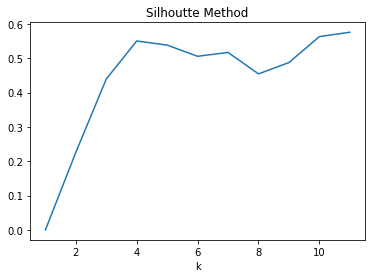

In [24]:
sVals = silhoutteMethod(12)
plt.plot(np.arange(1,12), sVals)

plt.xlabel("k")
plt.title("Silhoutte Method")

Text(0.5, 1.0, 'Elbow Method')

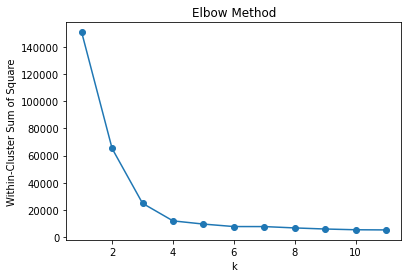

In [25]:
elbow = elbowMethod(12)
plt.plot(np.arange(1,12), elbow)
plt.scatter(np.arange(1,12), elbow)


plt.xlabel("k")
plt.ylabel("Within-Cluster Sum of Square")
plt.title("Elbow Method")

**NONCONVEX DATA**

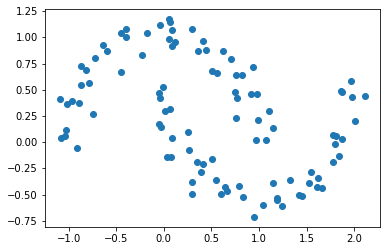

In [26]:
data, label = make_moons(n_samples=100, noise=0.1)
x, y = data[:,0],data[:,1]
plt.scatter(x,y)
k = 2

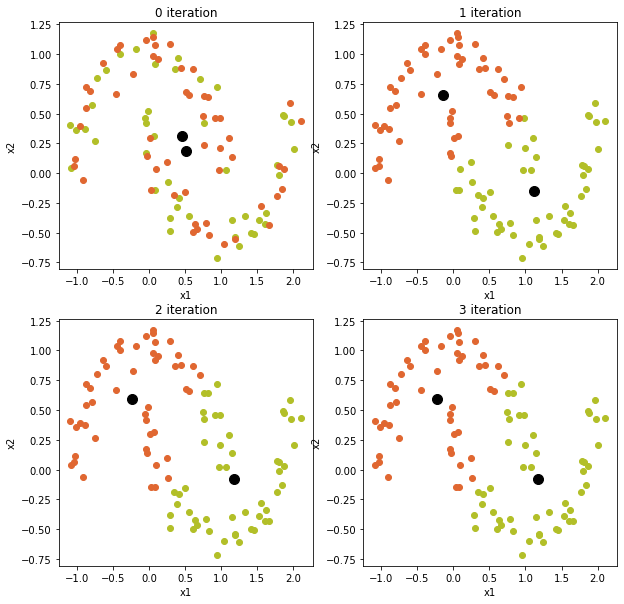

In [27]:
fig = plt.figure(figsize=(10,10))
axs = [fig.add_subplot(2,2,i) for i in range(1,5)]
clusters, centroids, colmap, tur, objs, x, y = runKMeans(k, True, fig,axs)

Text(0.5, 1.0, 'last iteration')

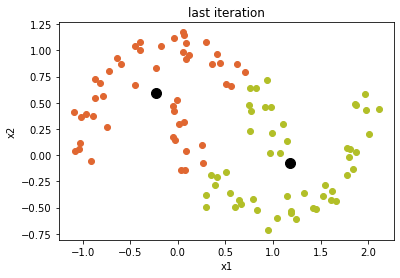

In [28]:
plotData(k,plt,clusters, centroids, colmap)
plt.xlabel("x1")
plt.ylabel("x2")
plt.title("last iteration")

Text(0.5, 1.0, 'Objective Function')

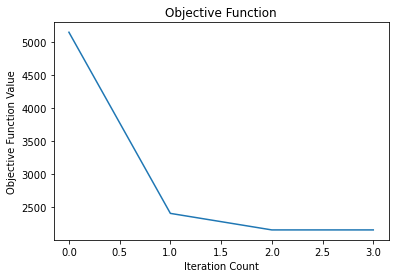

In [29]:
plt.plot(np.arange(0,tur), objs)
plt.ylabel("Objective Function Value")
plt.xlabel("Iteration Count")
plt.title("Objective Function")

Text(0.5, 1.0, 'Scikit K-Means')

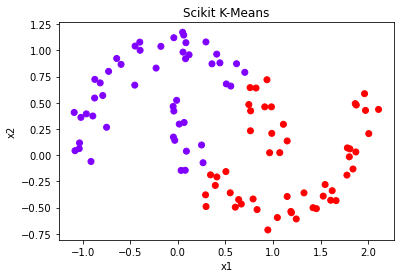

In [30]:
kmeans = KMeans(n_clusters=k)
X = [[x[i],y[i]] for i in range(len(x))]
kmeans.fit(X)
plt.scatter(x,y, c=kmeans.labels_, cmap='rainbow')
plt.xlabel("x1")
plt.ylabel("x2")
plt.title("Scikit K-Means")

Text(0.5, 1.0, 'Silhoutte Method')

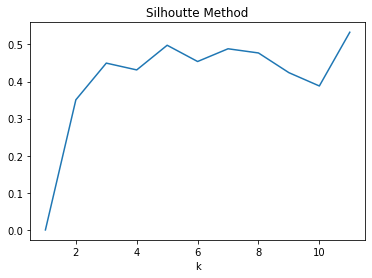

In [31]:
sVals = silhoutteMethod(12)
plt.plot(np.arange(1,12), sVals)

plt.xlabel("k")
plt.title("Silhoutte Method")

Text(0.5, 1.0, 'Elbow Method')

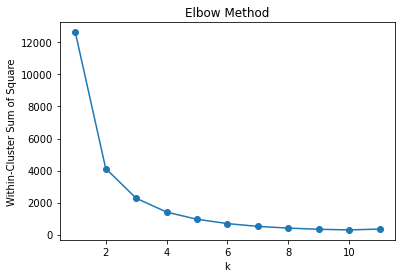

In [32]:
elbow = elbowMethod(12)
plt.plot(np.arange(1,12), elbow)
plt.scatter(np.arange(1,12), elbow)


plt.xlabel("k")
plt.ylabel("Within-Cluster Sum of Square")
plt.title("Elbow Method")